In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pydicom
import scipy.misc
import os
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.image import img_to_array, load_img, array_to_img
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input


In [2]:
# this project is to read dcm files
# path is like below
# 003_S_6264\Axial_T2_STAR\2018-06-04_13_53_15.0\I1005752\ADNI_003_S_6264_MR_Axial_T2_STAR__raw_20180605145020148_1_S692129_I1005752.dcm
# while 003_S_6264 reprsent the subject number
# 2018... is time

# now wirte a code to read the file
# PATH1 are all subfolders in the './' folder
PATH_LIST = np.array([])
PATH1 = [f for f in os.listdir('./ADNI/') if not f.endswith('.ipynb')]
for i in range(len(PATH1)):
    # print(i)
    path = './ADNI/'+PATH1[i]
    # put forward the path to the only folder in the path
    next = [f for f in os.listdir(path) if not f.endswith('.ipynb')]
    path = path+'/'+next[0]
    # put forward the path to the only folder in the path
    next = [f for f in os.listdir(path) if not f.endswith('.ipynb')]
    
    for j in range(len(next)):
        path_ = path+'/'+next[j]
        # put forward the path to the only folder in the path
        next_ = [f for f in os.listdir(path_) if not f.endswith('.ipynb')]
        path_ = path_+'/'+next_[0]

        PATH_LIST = np.append(PATH_LIST,path_)
    #     print(i)
    # path = path+'/'+next[0]
    

    
    # print(len(dcm_files))


# for path1 in PATH1:
#     path = './'+path1+'/Axial_T2_STAR/2018-06-04_13_53_15.0/I1005752'

#     # Get all .dcm filenames in the folder
#     dcm_files = [f for f in os.listdir(path) if f.endswith('.dcm')]


In [3]:
path = PATH_LIST[0]
dcm_files = [f for f in os.listdir(path) if f.endswith('.dcm')]
# for i in range(len(dcm_files)):
#     name = dcm_files[i]
#     ds = pydicom.read_file(path+'/'+name)   
#     img = ds.pixel_array
    # plt.imshow(img)
    # plt.show()

In [4]:
len(dcm_files)

44

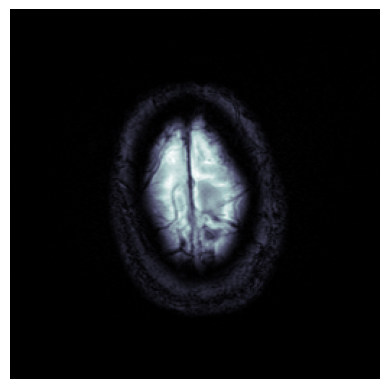

In [13]:
name = dcm_files[0]
ds = pydicom.read_file(path+'/'+name)   
img = ds.pixel_array
plt.imshow(img, cmap=plt.cm.bone)
# hide axis
plt.axis('off')
# drop the image border
plt.show()

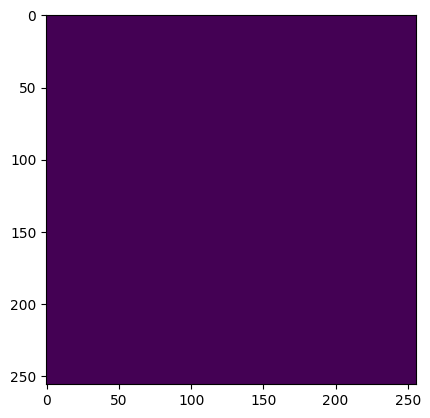

In [13]:
# edge detection and drop the black edge
from skimage import feature
edges = feature.canny(img)
plt.imshow(edges)
plt.show()
